# James Liem
#### "On my honor, as a student, I have neither given nor received unauthorized aid on this academic work."

#### The goal of this project:
To predict a movie success from many variables using regression, clustering, classification, visualizations, and correlation analysis.

In this project I will use imdb_score as the determinator of a movie success. I will also use many variables to predict the relationship to imdb_score. In order to perform data analytics in this project, I need to collect all the variables to be able to predict the success of a movie. The dataset is provided from https://data.world/popculture/imdb-5000-movie-dataset. 

## Import all the necessary packages

In [1]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#regression packages
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

#lasso regression
from sklearn import linear_model

#f_regression (feature selection)
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

# recursive feature selection (feature selection)
from sklearn.feature_selection import RFE


#import decisiontreeclassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import SVG
from IPython.display import display
#import logisticregression classifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
#import knn classifier
from sklearn.neighbors import KNeighborsClassifier

#for validating your classification model
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split, GridSearchCV 
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

# feature selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

import scipy.stats as stats
from pandas.tools import plotting
import statsmodels.api as sm
from statsmodels.formula.api import ols
from patsy import dmatrices

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import ward_tree
from scipy.cluster.hierarchy import dendrogram, linkage, ward

from sklearn.metrics import pairwise_distances

## 1. Collect data

In [2]:
# set columns to be all readable and visible
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', None)

In [3]:
# open the data
df = pd.read_csv("data/movie_metadata.csv")
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_tt_tt_1,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pirate|singapore,http://www.imdb.com/title/tt0449088/?ref_=fn_tt_tt_1,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_tt_tt_1,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police officer|terrorist plot,http://www.imdb.com/title/tt1345836/?ref_=fn_tt_tt_1,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_tt_tt_1,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


## 2. Inspect data

In [4]:
# check columns
df.columns

Index([u'color', u'director_name', u'num_critic_for_reviews', u'duration',
       u'director_facebook_likes', u'actor_3_facebook_likes', u'actor_2_name',
       u'actor_1_facebook_likes', u'gross', u'genres', u'actor_1_name',
       u'movie_title', u'num_voted_users', u'cast_total_facebook_likes',
       u'actor_3_name', u'facenumber_in_poster', u'plot_keywords',
       u'movie_imdb_link', u'num_user_for_reviews', u'language', u'country',
       u'content_rating', u'budget', u'title_year', u'actor_2_facebook_likes',
       u'imdb_score', u'aspect_ratio', u'movie_facebook_likes'],
      dtype='object')

In [5]:
# check the basic stat 
df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [6]:
# check missing values
df.isnull().sum()

color                        19 
director_name                104
num_critic_for_reviews       50 
duration                     15 
director_facebook_likes      104
actor_3_facebook_likes       23 
actor_2_name                 13 
actor_1_facebook_likes       7  
gross                        884
genres                       0  
actor_1_name                 7  
movie_title                  0  
num_voted_users              0  
cast_total_facebook_likes    0  
actor_3_name                 23 
facenumber_in_poster         13 
plot_keywords                153
movie_imdb_link              0  
num_user_for_reviews         21 
language                     12 
country                      5  
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes       13 
imdb_score                   0  
aspect_ratio                 329
movie_facebook_likes         0  
dtype: int64

In [7]:
# check data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

* **There are 5043 observations and 28 variables.**
* **Data has many missing values.**
* **Numerical columns: num_voted_users, cast_total_facebook_likes, movie_facebook_likes.**
* **Categorical columns: num_critic_for_reviews, duration, director_facebook_likes, actor_3_facebook_likes, actor_1_facebook_likes, gross, facenumber_in_poster, num_user_for_reviews, budget, title_year, actor_2_facebook_likes, imdb_score, aspect_ratio.**

## 3. Clean, transform, integrate data

In [8]:
# remove unnecessary columns
df = df.drop(['color','director_name', 'movie_imdb_link', 'language', 'content_rating', 'country', 'title_year', 'movie_title', 'genres', 'plot_keywords', 'aspect_ratio', 'actor_1_name', 'actor_2_name', 'actor_3_name'], axis=1)
df.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,actor_2_facebook_likes,imdb_score,movie_facebook_likes
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,936.0,7.9,33000
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,5000.0,7.1,0
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,245000000.0,393.0,6.8,85000
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,23000.0,8.5,164000
4,NaN,NaN,131.0,NaN,131.0,NaN,8,143,0.0,NaN,NaN,12.0,7.1,0


In [9]:
# check missing values
df.isnull().sum()

num_critic_for_reviews       50 
duration                     15 
director_facebook_likes      104
actor_3_facebook_likes       23 
actor_1_facebook_likes       7  
gross                        884
num_voted_users              0  
cast_total_facebook_likes    0  
facenumber_in_poster         13 
num_user_for_reviews         21 
budget                       492
actor_2_facebook_likes       13 
imdb_score                   0  
movie_facebook_likes         0  
dtype: int64

In [10]:
# remove missing values
df = df.dropna()
df.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,actor_2_facebook_likes,imdb_score,movie_facebook_likes
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,936.0,7.9,33000
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,5000.0,7.1,0
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,245000000.0,393.0,6.8,85000
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,23000.0,8.5,164000
5,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,1.0,738.0,263700000.0,632.0,6.6,24000


In [11]:
# save the data
df.to_csv("data/df_cleaned.csv")

In [12]:
# check missing values
df.isnull().sum()

num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_1_facebook_likes       0
gross                        0
num_voted_users              0
cast_total_facebook_likes    0
facenumber_in_poster         0
num_user_for_reviews         0
budget                       0
actor_2_facebook_likes       0
imdb_score                   0
movie_facebook_likes         0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3873 entries, 0 to 5042
Data columns (total 14 columns):
num_critic_for_reviews       3873 non-null float64
duration                     3873 non-null float64
director_facebook_likes      3873 non-null float64
actor_3_facebook_likes       3873 non-null float64
actor_1_facebook_likes       3873 non-null float64
gross                        3873 non-null float64
num_voted_users              3873 non-null int64
cast_total_facebook_likes    3873 non-null int64
facenumber_in_poster         3873 non-null float64
num_user_for_reviews         3873 non-null float64
budget                       3873 non-null float64
actor_2_facebook_likes       3873 non-null float64
imdb_score                   3873 non-null float64
movie_facebook_likes         3873 non-null int64
dtypes: float64(11), int64(3)
memory usage: 453.9 KB


**There are 3873 entries after removing null or missing values**

## 4. Building Regression Models

### a. Multiple Regression Model Using Scikit

In [14]:
# define X and y
y = df['imdb_score'] 
X = df[['num_critic_for_reviews','duration','director_facebook_likes','actor_3_facebook_likes','actor_1_facebook_likes','gross','num_voted_users','cast_total_facebook_likes','facenumber_in_poster','num_user_for_reviews','budget','actor_2_facebook_likes','movie_facebook_likes']]

In [15]:
y.head()

0    7.9
1    7.1
2    6.8
3    8.5
5    6.6
Name: imdb_score, dtype: float64

In [16]:
X.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,actor_2_facebook_likes,movie_facebook_likes
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,936.0,33000
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,5000.0,0
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,245000000.0,393.0,85000
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,23000.0,164000
5,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,1.0,738.0,263700000.0,632.0,24000


In [17]:
# build a simple multiple regression model
model1 = lm.LinearRegression()
model1.fit(X, y)   
model1_y = model1.predict(X)
print 'Coefficients: ', model1.coef_
print "y-intercept ", model1.intercept_

Coefficients:  [ 1.47163016e-03  1.17889770e-02  6.26437093e-06  7.85829324e-05
  7.84189254e-05 -1.85903144e-09  4.04898903e-06 -7.79254475e-05
 -3.17600762e-02 -5.76083248e-04 -6.21324582e-11  8.07634285e-05
 -2.51671331e-06]
y-intercept  4.923874250581658


In [18]:
pd.DataFrame(zip(X.columns, np.transpose(model1.coef_)))

,0,1
0,num_critic_for_reviews,1.471630e-03
1,duration,1.178898e-02
2,director_facebook_likes,6.264371e-06
3,actor_3_facebook_likes,7.858293e-05
4,actor_1_facebook_likes,7.841893e-05
5,gross,-1.859031e-09
6,num_voted_users,4.048989e-06
7,cast_total_facebook_likes,-7.792545e-05
8,facenumber_in_poster,-3.176008e-02
9,num_user_for_reviews,-5.760832e-04


In [19]:
print "mean square error: ", mean_squared_error(y, model1_y)
print "variance or r-squared: ", explained_variance_score(y, model1_y)

mean square error:  0.7575252861195236
variance or r-squared:  0.3215570104210149


#### Model Multiple Regression:
* This model has a low accuracy rate of predicting, 32.16% and it is not be the best model since it has too many X variables and implementing too complexed model in the real world would not be possible.
* Too many variables also caused multicollinearity.

### b. RandomForest Regressor

In [20]:
# random forest regressor model
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

#assigning columns to X and Y variables
y = df['imdb_score'] 
X = df[['num_critic_for_reviews','duration','director_facebook_likes','actor_3_facebook_likes','actor_1_facebook_likes','gross','num_voted_users','cast_total_facebook_likes','facenumber_in_poster','num_user_for_reviews','budget','actor_2_facebook_likes','movie_facebook_likes']]

regr = RandomForestRegressor(random_state=0)
regr.fit(X, y)
regr_predicted = regr.predict(X)

print "mean square error: ", mean_squared_error(y, regr_predicted)
print "variance or r-squared: ", explained_variance_score(y, regr_predicted)

mean square error:  0.10364211205783633
variance or r-squared:  0.9072237110117765


In [21]:
sorted(zip(regr.feature_importances_, X.columns))

[(0.021651078547622653, 'facenumber_in_poster'),
 (0.024206852248708388, 'actor_1_facebook_likes'),
 (0.0304027109377993, 'cast_total_facebook_likes'),
 (0.03410865557992693, 'movie_facebook_likes'),
 (0.036383629380620695, 'actor_2_facebook_likes'),
 (0.03690950491178749, 'director_facebook_likes'),
 (0.04607273228412592, 'actor_3_facebook_likes'),
 (0.06416838272210199, 'num_critic_for_reviews'),
 (0.07081553004701488, 'num_user_for_reviews'),
 (0.07565872588011104, 'gross'),
 (0.11483690350133031, 'duration'),
 (0.12373534298863273, 'budget'),
 (0.3210499509702177, 'num_voted_users')]

#### Model RandomForest Regressor:

From the RandomForestRegressor model, we have a very high r-sq, 90.72% and a very low MSE, which is very good at predicting. The best predictor from this model seems to be num_voted_users. 

### c. Regularization or Ridge Technique

In [22]:
# build a regularization regression model
# ridge technique
#assigning columns to X and Y variables
y = df['imdb_score'] 
X = df[['num_critic_for_reviews','duration','director_facebook_likes','actor_3_facebook_likes','actor_1_facebook_likes','gross','num_voted_users','cast_total_facebook_likes','facenumber_in_poster','num_user_for_reviews','budget','actor_2_facebook_likes','movie_facebook_likes']]

In [23]:
#Fit the model
model2 = lm.Ridge(alpha =1)      
model2.fit(X, y)
model2_y = model2.predict(X)

C:\Users\User\Anaconda2\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number7.923097e-17
  overwrite_a=True).T


In [24]:
print 'Coefficients: ', model2.coef_
print "y-intercept ", model2.intercept_

Coefficients:  [ 1.47163148e-03  1.17889588e-02  6.26445512e-06  7.85828426e-05
  7.84190118e-05 -1.85902876e-09  4.04898753e-06 -7.79255457e-05
 -3.17580667e-02 -5.76081828e-04 -6.21320802e-11  8.07635118e-05
 -2.51671974e-06]
y-intercept  4.92387313759922


In [25]:
coef = ["%.3f" % i for i in model2.coef_]
xcolumns = [ i for i in X.columns ]
zip(xcolumns, coef)

[('num_critic_for_reviews', '0.001'),
 ('duration', '0.012'),
 ('director_facebook_likes', '0.000'),
 ('actor_3_facebook_likes', '0.000'),
 ('actor_1_facebook_likes', '0.000'),
 ('gross', '-0.000'),
 ('num_voted_users', '0.000'),
 ('cast_total_facebook_likes', '-0.000'),
 ('facenumber_in_poster', '-0.032'),
 ('num_user_for_reviews', '-0.001'),
 ('budget', '-0.000'),
 ('actor_2_facebook_likes', '0.000'),
 ('movie_facebook_likes', '-0.000')]

In [26]:
# create a table for coefficient values
a = zip(xcolumns, coef)
df1 = pd.DataFrame(a)
df1.sort_values(1, ascending=False)

,0,1
1,duration,0.012
0,num_critic_for_reviews,0.001
2,director_facebook_likes,0.000
3,actor_3_facebook_likes,0.000
4,actor_1_facebook_likes,0.000
6,num_voted_users,0.000
11,actor_2_facebook_likes,0.000
8,facenumber_in_poster,-0.032
9,num_user_for_reviews,-0.001
5,gross,-0.000


In [27]:
print "mean square error: ", mean_squared_error(y, model2_y)
print "variance or r-squared: ", explained_variance_score(y, model2_y)

mean square error:  0.7575252861360569
variance or r-squared:  0.3215570104062079


#### Model Ridge:
From Ridge technique, removes some predictors to make the model simpler. Also, the MSE we got is very high which is bad. And, the r-sq is 32.16% of being accurate, which is pretty inaccurate.

### d. Feature Selection or f_regression

In [28]:
# feature selection model
# select only 3 X variables
X_new = SelectKBest(f_regression, k=3).fit_transform(X, y)
X_new

array([[7.23000e+02, 1.78000e+02, 8.86204e+05],
       [3.02000e+02, 1.69000e+02, 4.71220e+05],
       [6.02000e+02, 1.48000e+02, 2.75868e+05],
       ...,
       [5.60000e+01, 8.10000e+01, 5.20550e+04],
       [1.40000e+01, 9.50000e+01, 1.33800e+03],
       [4.30000e+01, 9.00000e+01, 4.28500e+03]])

In [29]:
df1.head(3)

,0,1
0,num_critic_for_reviews,0.001
1,duration,0.012
2,director_facebook_likes,0.000


In [30]:
model3 = lm.LinearRegression()
model3.fit(X_new, y)
model3_y = model3.predict(X_new)

print "mean square error: ", mean_squared_error(y, model3_y)
print "variance or r-squared: ", explained_variance_score(y, model3_y)

mean square error:  0.8115978913964041
variance or r-squared:  0.27312934648613374


#### Model Feature Selection:
From Feature Selection technique, the MSE we got is very high which is bad. And, the r-sq is 27.31% of being accurate, which is inaccurate for predicting.

## 5. Build Classification Models

In [31]:
# create categorical column for imdb_score_category
df['imdb_score_category'] = 4
df.loc[df['imdb_score'] < 4,'imdb_score_category'] = 1
df.loc[(df['imdb_score'] >= 4) & (df['imdb_score'] <= 6), 'imdb_score_category'] = 2
df.loc[(df['imdb_score'] > 6) & (df['imdb_score'] <= 8), 'imdb_score_category'] = 3
df.loc[df['imdb_score'] > 8,'imdb_score_category'] = 4
df.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,actor_2_facebook_likes,imdb_score,movie_facebook_likes,imdb_score_category
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,936.0,7.9,33000,3
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,5000.0,7.1,0,3
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,245000000.0,393.0,6.8,85000,3
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,23000.0,8.5,164000,4
5,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,1.0,738.0,263700000.0,632.0,6.6,24000,3


In [32]:
# drop column imdb_score
df3 = df.drop(['imdb_score'], axis=1)
df3.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,actor_2_facebook_likes,movie_facebook_likes,imdb_score_category
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,936.0,33000,3
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,5000.0,0,3
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,245000000.0,393.0,85000,3
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,23000.0,164000,4
5,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,1.0,738.0,263700000.0,632.0,24000,3


In [33]:
# assign X and y values
y = df3['imdb_score_category']
X = df3[['num_critic_for_reviews','duration','director_facebook_likes','actor_3_facebook_likes','actor_1_facebook_likes','gross','num_voted_users','cast_total_facebook_likes','facenumber_in_poster','num_user_for_reviews','budget','actor_2_facebook_likes','movie_facebook_likes']]


In [34]:
# change salary string type to category type
df3['imdb_score_category'] = df3['imdb_score_category'].astype('category')
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3873 entries, 0 to 5042
Data columns (total 14 columns):
num_critic_for_reviews       3873 non-null float64
duration                     3873 non-null float64
director_facebook_likes      3873 non-null float64
actor_3_facebook_likes       3873 non-null float64
actor_1_facebook_likes       3873 non-null float64
gross                        3873 non-null float64
num_voted_users              3873 non-null int64
cast_total_facebook_likes    3873 non-null int64
facenumber_in_poster         3873 non-null float64
num_user_for_reviews         3873 non-null float64
budget                       3873 non-null float64
actor_2_facebook_likes       3873 non-null float64
movie_facebook_likes         3873 non-null int64
imdb_score_category          3873 non-null category
dtypes: category(1), float64(10), int64(3)
memory usage: 427.6 KB


### a. Decision Tree

In [35]:
# build decision tree model
# split validation (train 70% and test 30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Initialize DecisionTreeClassifier()
df2 = DecisionTreeClassifier()

# Train a decision tree model
df2.fit(X_train, y_train)

#Model evaluation
print metrics.accuracy_score(y_test, df2.predict(X_test))
print "--------------------------------------------------------"
print metrics.confusion_matrix(y_test, df2.predict(X_test)) 
print "--------------------------------------------------------"
print metrics.classification_report(y_test, df2.predict(X_test))

0.6617900172117039
--------------------------------------------------------
[[  6  13   7   0]
 [ 11 161 158   1]
 [ 14 142 579  21]
 [  0   0  26  23]]
--------------------------------------------------------
             precision    recall  f1-score   support

          1       0.19      0.23      0.21        26
          2       0.51      0.49      0.50       331
          3       0.75      0.77      0.76       756
          4       0.51      0.47      0.49        49

avg / total       0.66      0.66      0.66      1162



In [36]:
# visualize decision tree
tree.export_graphviz(df2, out_file='data/decisiontree_final.dot', feature_names=X.columns)

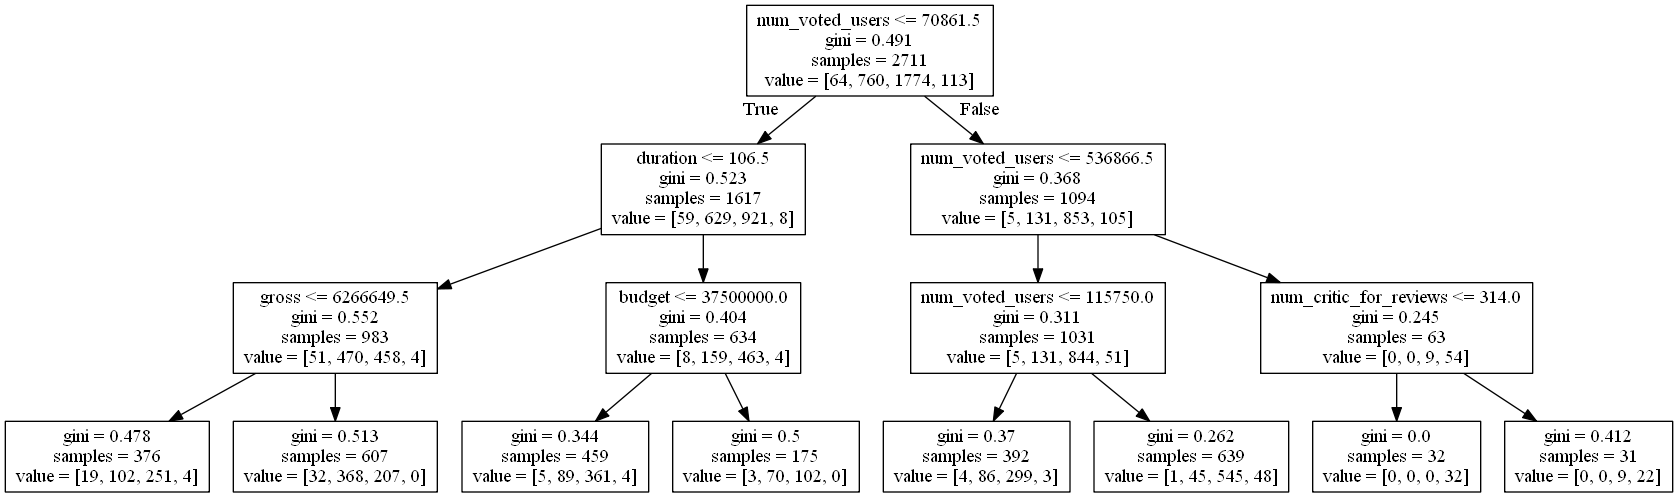

In [37]:
from IPython.display import Image
Image("data/decisiontree_final.png")

This decision tree is too complex. Hence, we need to make a simpler one.

In [38]:
# max_depth = 5
# split validation (train 70% and test 30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Initialize DecisionTreeClassifier()
df_simple = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)

# Train a decision tree model
df_simple.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [39]:
#Model evaluation
print metrics.accuracy_score(y_test, df_simple.predict(X_test))
print "--------------------------------------------------------"
print metrics.confusion_matrix(y_test, df_simple.predict(X_test)) 
print "--------------------------------------------------------"
print metrics.classification_report(y_test, df_simple.predict(X_test))

0.6944922547332186
--------------------------------------------------------
[[  0  15  11   0]
 [  0 138 193   0]
 [  0 104 649   3]
 [  0   0  29  20]]
--------------------------------------------------------
             precision    recall  f1-score   support

          1       0.00      0.00      0.00        26
          2       0.54      0.42      0.47       331
          3       0.74      0.86      0.79       756
          4       0.87      0.41      0.56        49

avg / total       0.67      0.69      0.67      1162



C:\Users\User\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [40]:
# visualize decision tree
tree.export_graphviz(df_simple, out_file='data/decisiontreesimple_final.dot', feature_names=X.columns)

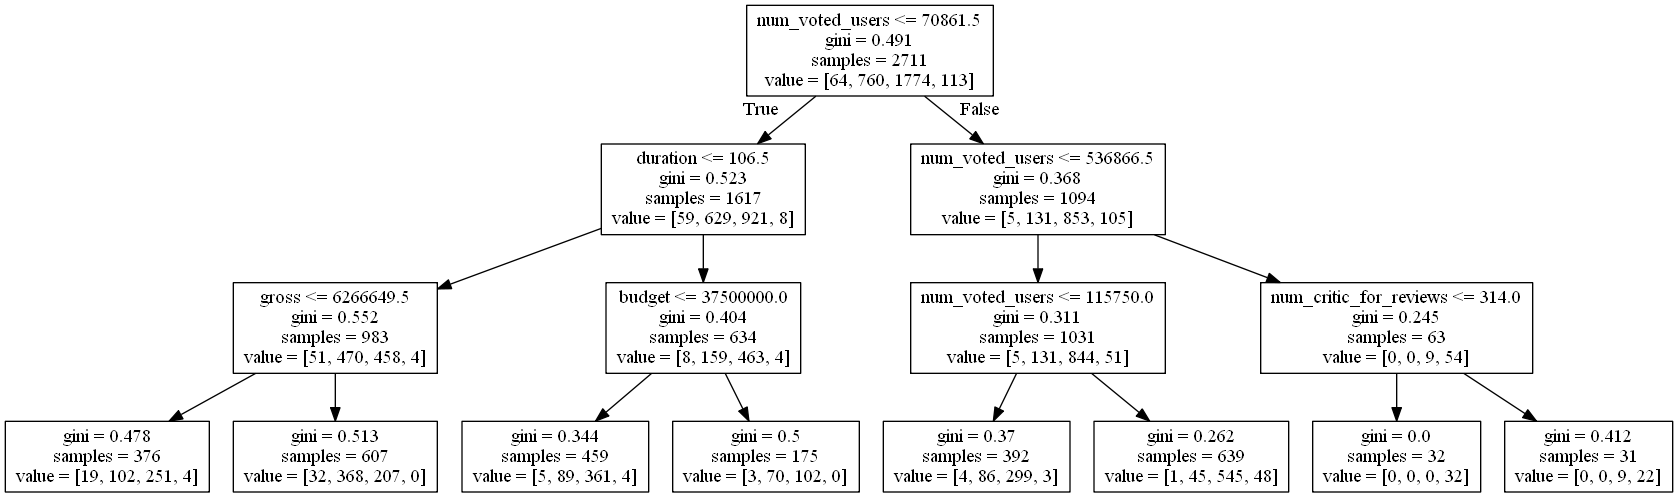

In [41]:
from IPython.display import Image
Image("data/decisiontreesimple_final.png")

#### Model Decision Tree:
The simpler decision tree model actually has a better prediction accuracy rate with 69.44% than the complex decision tree model. 

### b. KNN or K-nearest Neighbors

Text(0,0.5,'accuracy')

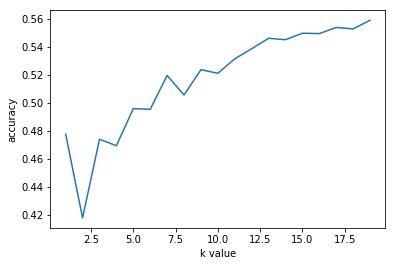

In [42]:
# build knn model
# search for an optimal value of K
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores.append(np.mean(cross_val_score(knn, X, y, cv=10, scoring='accuracy')))

# plot the K values (x-axis) versus the 10-fold CV score (y-axis)
plt.figure()
plt.plot(k_range, scores)
plt.xlabel('k value')
plt.ylabel('accuracy')

In [43]:
print scores

[0.4776552539600461, 0.4177189518958552, 0.47403637149669403, 0.46937657501151675, 0.49597027146609, 0.49544284398381644, 0.519695699848336, 0.5057468698705875, 0.5238294007993468, 0.5212414495950775, 0.5315740130692528, 0.5387978575974217, 0.5462947206713074, 0.5452584581957644, 0.5499142828048377, 0.5496479068795017, 0.5540413274393431, 0.5530037569839108, 0.5592066393196149]


In [44]:
# develop a new knn model with k = 2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [45]:
#Model evaluation
print metrics.accuracy_score(y_test, knn.predict(X_test))
print metrics.confusion_matrix(y_test, knn.predict(X_test))
print metrics.classification_report(y_test, knn.predict(X_test))

0.5283993115318416
[[  3  12  11   0]
 [ 15 189 127   0]
 [ 19 315 420   2]
 [  1  18  28   2]]
             precision    recall  f1-score   support

          1       0.08      0.12      0.09        26
          2       0.35      0.57      0.44       331
          3       0.72      0.56      0.63       756
          4       0.50      0.04      0.08        49

avg / total       0.59      0.53      0.54      1162



#### Model KNN:
The KNN model has a 52.83% of being accurately predicting. Based from our KNN model, it seems that the optimal value is 19 with 55.9% accuracy rate.

### c. Logistics Regression

In [46]:
# build logistics regression model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [47]:
#Model evaluation

print metrics.accuracy_score(y_test, lr.predict(X_test))
print "--------------------------------------------------------"
print metrics.confusion_matrix(y_test, lr.predict(X_test)) 
print "--------------------------------------------------------"
print metrics.classification_report(y_test, lr.predict(X_test))

0.6359724612736661
--------------------------------------------------------
[[  0   0  26   0]
 [  0  13 318   0]
 [  0  13 705  38]
 [  0   0  28  21]]
--------------------------------------------------------
             precision    recall  f1-score   support

          1       0.00      0.00      0.00        26
          2       0.50      0.04      0.07       331
          3       0.65      0.93      0.77       756
          4       0.36      0.43      0.39        49

avg / total       0.58      0.64      0.54      1162



C:\Users\User\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### Model Logistics Regression:
The logistics regression model has 63.6% of being accurately predicting.

### d. Random Forest Classifier

In [48]:
# build random forest model
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=20)    #building 20 decision trees
clf=clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7383820998278829

In [49]:
# generate evaluation metrics
print metrics.accuracy_score(y_test, clf.predict(X_test)) 
print metrics.confusion_matrix(y_test, clf.predict(X_test))
print metrics.classification_report(y_test, clf.predict(X_test))

0.7383820998278829
[[  2  16   8   0]
 [  0 163 168   0]
 [  1  78 673   4]
 [  0   0  29  20]]
             precision    recall  f1-score   support

          1       0.67      0.08      0.14        26
          2       0.63      0.49      0.55       331
          3       0.77      0.89      0.82       756
          4       0.83      0.41      0.55        49

avg / total       0.73      0.74      0.72      1162



#### Model Random Forest Classifier:
Random forest classifier has a prediction accuracy rate of 73.84%, which is good.

### e. Feature Selection Classification

In [50]:
# build feature selection
# select best; k=5
X_new = SelectKBest(chi2, k=5).fit_transform(X, y)
print X_new

[[0.00000000e+00 7.60505847e+08 8.86204000e+05 2.37000000e+08
  3.30000000e+04]
 [5.63000000e+02 3.09404152e+08 4.71220000e+05 3.00000000e+08
  0.00000000e+00]
 [0.00000000e+00 2.00074175e+08 2.75868000e+05 2.45000000e+08
  8.50000000e+04]
 ...
 [0.00000000e+00 2.04092000e+06 5.20550000e+04 7.00000000e+03
  0.00000000e+00]
 [0.00000000e+00 4.58400000e+03 1.33800000e+03 9.00000000e+03
  4.13000000e+02]
 [1.60000000e+01 8.52220000e+04 4.28500000e+03 1.10000000e+03
  4.56000000e+02]]


In [51]:
selector = SelectKBest(chi2, k=5).fit(X, y)
idxs_selected = selector.get_support(indices=True)
print idxs_selected

[ 2  5  6 10 12]


In [52]:
X.head(1)

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,actor_2_facebook_likes,movie_facebook_likes
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,936.0,33000


**The best predictors based on feature selection model are director_facebook_likes, gross, num_voted_users, budget, movie_facebook_likes.**

In [53]:
# evaluate the model by splitting into train (70%) and test sets (30%)
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=0)
#model2 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3,min_samples_leaf=5)
dt = tree.DecisionTreeClassifier()
dt.fit(X_train, y_train)

#Model evaluation
print metrics.accuracy_score(y_test, dt.predict(X_test))
print "--------------------------------------------------------"
print metrics.confusion_matrix(y_test, dt.predict(X_test)) 
print "--------------------------------------------------------"
print metrics.classification_report(y_test, dt.predict(X_test))

0.6514629948364888
--------------------------------------------------------
[[  6  11   9   0]
 [  9 166 153   3]
 [ 10 174 555  17]
 [  0   2  17  30]]
--------------------------------------------------------
             precision    recall  f1-score   support

          1       0.24      0.23      0.24        26
          2       0.47      0.50      0.49       331
          3       0.76      0.73      0.74       756
          4       0.60      0.61      0.61        49

avg / total       0.66      0.65      0.65      1162



#### Model Feature Selection Classification:
The best predictors based on feature selection model are director_facebook_likes, gross, num_voted_users, budget, movie_facebook_likes. The feature selection classification model has a predicting rate of 65.15% of being correct. 

## 6. Build Clustering Models

In [54]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3873 entries, 0 to 5042
Data columns (total 14 columns):
num_critic_for_reviews       3873 non-null float64
duration                     3873 non-null float64
director_facebook_likes      3873 non-null float64
actor_3_facebook_likes       3873 non-null float64
actor_1_facebook_likes       3873 non-null float64
gross                        3873 non-null float64
num_voted_users              3873 non-null int64
cast_total_facebook_likes    3873 non-null int64
facenumber_in_poster         3873 non-null float64
num_user_for_reviews         3873 non-null float64
budget                       3873 non-null float64
actor_2_facebook_likes       3873 non-null float64
movie_facebook_likes         3873 non-null int64
imdb_score_category          3873 non-null category
dtypes: category(1), float64(10), int64(3)
memory usage: 427.6 KB


In [55]:
# drop unnecessary columns
df4 = df3.drop(['imdb_score_category'], axis=1)
df4.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,actor_2_facebook_likes,movie_facebook_likes
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,936.0,33000
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,5000.0,0
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,245000000.0,393.0,85000
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,23000.0,164000
5,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,1.0,738.0,263700000.0,632.0,24000


In [56]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3873 entries, 0 to 5042
Data columns (total 13 columns):
num_critic_for_reviews       3873 non-null float64
duration                     3873 non-null float64
director_facebook_likes      3873 non-null float64
actor_3_facebook_likes       3873 non-null float64
actor_1_facebook_likes       3873 non-null float64
gross                        3873 non-null float64
num_voted_users              3873 non-null int64
cast_total_facebook_likes    3873 non-null int64
facenumber_in_poster         3873 non-null float64
num_user_for_reviews         3873 non-null float64
budget                       3873 non-null float64
actor_2_facebook_likes       3873 non-null float64
movie_facebook_likes         3873 non-null int64
dtypes: float64(10), int64(3)
memory usage: 423.6 KB


In [57]:
# variance test 
df4.var()

num_critic_for_reviews       1.532759e+04
duration                     5.139369e+02
director_facebook_likes      9.146316e+06
actor_3_facebook_likes       3.490984e+06
actor_1_facebook_likes       2.368439e+08
gross                        4.870319e+15
num_voted_users              2.271444e+10
cast_total_facebook_likes    3.593828e+08
facenumber_in_poster         4.229392e+00
num_user_for_reviews         1.667013e+05
budget                       4.967067e+16
actor_2_facebook_likes       2.017927e+07
movie_facebook_likes         4.491792e+08
dtype: float64

In [58]:
# normalize the data
df_norm = (df4 - df4.mean()) / (df4.max() - df4.min())
df_norm.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,actor_2_facebook_likes,movie_facebook_likes
0,0.689191,0.229912,-0.034108,0.004376,-0.010317,0.932804,0.463620,-0.009847,-0.032137,0.538853,0.015696,-0.007594,0.068450
1,0.170718,0.199507,-0.009630,0.010681,0.050620,0.339644,0.218032,0.056415,-0.032137,0.179889,0.020854,0.022071,-0.026106
2,0.540176,0.128561,-0.034108,-0.025797,0.005308,0.195884,0.102423,0.000608,-0.008881,0.131658,0.016351,-0.011557,0.217447
3,0.800028,0.182615,0.922414,0.967203,0.030308,0.522057,0.616383,0.145354,-0.032137,0.469076,0.016761,0.153457,0.443808
5,0.367762,0.074507,-0.013456,-0.009754,-0.010880,0.028870,0.064746,-0.014356,-0.008881,0.081055,0.017882,-0.009813,0.042662


In [59]:
df_norm.var()

num_critic_for_reviews       0.023247
duration                     0.005866
director_facebook_likes      0.017290
actor_3_facebook_likes       0.006599
actor_1_facebook_likes       0.000578
gross                        0.008421
num_voted_users              0.007955
cast_total_facebook_likes    0.000833
facenumber_in_poster         0.002287
num_user_for_reviews         0.006513
budget                       0.000333
actor_2_facebook_likes       0.001075
movie_facebook_likes         0.003688
dtype: float64

### a. Elbow method (optimal k) or K-means

In [60]:
# clustering analysis using k-means

k_means = KMeans(init='k-means++', n_clusters=4, random_state=0)
k_means.fit(df_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [61]:
#clustering results
k_means.labels_

array([1, 1, 1, ..., 0, 0, 0])

In [62]:
# find out cluster centers
k_means.cluster_centers_

array([[-0.09585164, -0.01559651, -0.02891281, -0.01406909, -0.00393504,
        -0.03145542, -0.04052824, -0.0058841 ,  0.00135258, -0.03438929,
        -0.00133902, -0.00617121, -0.02243553],
       [ 0.31562588,  0.06525335, -0.02091843,  0.07249269,  0.00904561,
         0.18434765,  0.17973325,  0.01833203,  0.00146461,  0.15009917,
         0.00484169,  0.02516109,  0.11662326],
       [ 0.103622  ,  0.05400976,  0.60560583,  0.03548492,  0.00939577,
         0.05358948,  0.10446304,  0.01415875, -0.00958982,  0.06901181,
         0.00068378,  0.01472646,  0.03561429],
       [ 0.09392879,  0.00701546, -0.02410228,  0.0050414 ,  0.00404103,
         0.00973474,  0.02084209,  0.00493273, -0.00155736,  0.02092987,
         0.00131855,  0.00383842,  0.01068729]])

In [63]:
# convert cluster lables to dataframe
df5 = pd.DataFrame(k_means.labels_, columns = ['cluster'])
df5.head()

,cluster
0,1
1,1
2,1
3,2
4,1


In [64]:
# reset index
df4 = df4.reset_index(drop=True)
df5 = df5.reset_index(drop=True)

df6 = df4.join(df5)
df6.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,actor_2_facebook_likes,movie_facebook_likes,cluster
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,936.0,33000,1
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,5000.0,0,1
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,245000000.0,393.0,85000,1
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,23000.0,164000,2
4,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,1.0,738.0,263700000.0,632.0,24000,1


In [65]:
df6.tail()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,actor_2_facebook_likes,movie_facebook_likes,cluster
3868,143.0,77.0,291.0,8.0,291.0,424760.0,72639,368,0.0,371.0,7000.0,45.0,19000,0
3869,35.0,80.0,0.0,0.0,0.0,70071.0,589,0,0.0,35.0,7000.0,0.0,74,0
3870,56.0,81.0,0.0,6.0,121.0,2040920.0,52055,147,0.0,130.0,7000.0,20.0,0,0
3871,14.0,95.0,0.0,133.0,296.0,4584.0,1338,690,1.0,14.0,9000.0,205.0,413,0
3872,43.0,90.0,16.0,16.0,86.0,85222.0,4285,163,0.0,84.0,1100.0,23.0,456,0


In [66]:
# find how many observations on each cluster
df6.groupby(['cluster']).size()

cluster
0    2244
1    272 
2    164 
3    1193
dtype: int64

* **Cluster 0 has 2244 observations**
* **Cluster 1 has 272 observations**
* **Cluster 2 has 164 observations**
* **Cluster 3 has 1193 observations**

In [67]:
# mean of each cluster for profiling
df6.groupby('cluster').mean()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,actor_2_facebook_likes,movie_facebook_likes
cluster,,,,,,,,,,,,,
0,85.581996,105.333779,119.473708,430.638592,5082.558378,2.717992e+07,34339.754456,7433.903743,1.439394,154.057932,2.889256e+07,1130.464795,1280.413547
1,419.665441,129.261029,303.356618,2421.672794,13392.194853,1.913005e+08,406504.036765,23340.025735,1.444853,1087.294118,1.044051e+08,5423.404412,49812.500000
2,247.518293,125.932927,14713.414634,1570.493902,13616.292683,9.185812e+07,279315.518293,20599.310976,0.969512,677.073171,5.361407e+07,3993.859756,21540.371951
3,239.708298,112.020117,230.243923,870.874267,10197.333613,5.853459e+07,138057.014250,14551.273261,1.316010,433.890193,6.141785e+07,2504.128248,12851.611065


### Movie profiling based on K-means (Using 4 different measures: lowest, low, high, highest):

**Cluster 0:**

* lowest num_critic_for_reviews
* lowest duration
* lowest director_facebook_likes
* lowest actor_3_facebook_likes
* lowest actor_1_facebook_likes
* lowest gross
* lowest num_voted_users
* lowest cast_total_facebook_likes
* lowest num_user_for reviews
* lowest budget
* lowest actor_2_facebook_likes
* lowest movie_facebook_likes

**Cluster 1:**

* highest num_critic_for_reviews
* highest duration
* high director_facebook_likes
* highest actor_3_facebook_likes
* high actor_1_facebook_likes
* highest gross
* highest num_voted_users
* highest cast_total_facebook_likes
* highest num_user_for_reviews
* highest budget
* highest actor_2_facebook_likes
* highest movie_facebook_likes

**Cluster 2:**

* high num_critic_for_reviews
* high duration
* highest director_facebook_likes
* high actor_3_facebook_likes
* highest actor_1_facebook_likes
* high gross
* high num_voted_users
* high cast_total_facebook_likes
* high num_user_for_reviews
* low budget
* high actor_2_facebook_likes
* high movie_facebook_likes

**Cluster 3:**

* high num_critic_for_reviews
* low duration
* low director_facebook_likes
* low actor_3_facebook_likes
* high actor_1_facebook_likes
* low gross
* low num_voted_users
* low cast_total_facebook_likes
* low num_user_for_reviews
* high budget
* low actor_2_facebook_likes
* low movie_facebook_likes

**Not important factor (the mean in each cluster is almost same):**

* facenumber_in_poster

Text(0.5,1,'Selecting k with the Elbow Method')

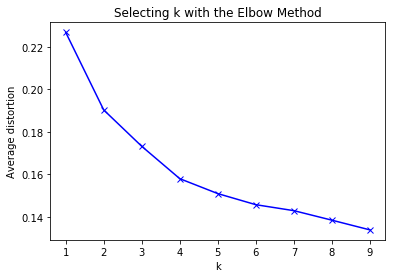

In [68]:
# find the optimal k (elbow method)
from scipy.spatial.distance import cdist 

K = range(1, 10) 

meandistortions = []

for k in K: 
    kmeans = KMeans(n_clusters=k, random_state=1) 
    kmeans.fit(df_norm) 
    meandistortions.append(sum(np.min(cdist(df_norm, kmeans.cluster_centers_, 'euclidean'), axis=1)) / df_norm.shape[0]) 

plt.plot(K, meandistortions, 'bx-') 
plt.xlabel('k') 
plt.ylabel('Average distortion') 
plt.title('Selecting k with the Elbow Method') 

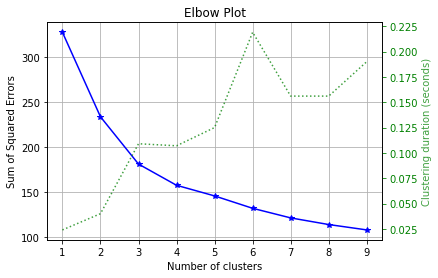

In [69]:
import scikitplot as skplt
kmeans = KMeans(random_state=1) 
skplt.cluster.plot_elbow_curve(kmeans, df_norm, cluster_ranges=range(1, 10))

#### Model Elbow Method (K-means):
Based on the elbow method (K-means), we find that the optimal value is 3 because number of clusters of 4 and beyond has insignificant difference. 

### b. Agglomerative Clustering

In [70]:
np.random.seed(1) # setting random seed to get the same results each time.

agg= AgglomerativeClustering(n_clusters=4, linkage='ward').fit(X)
agg.labels_

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

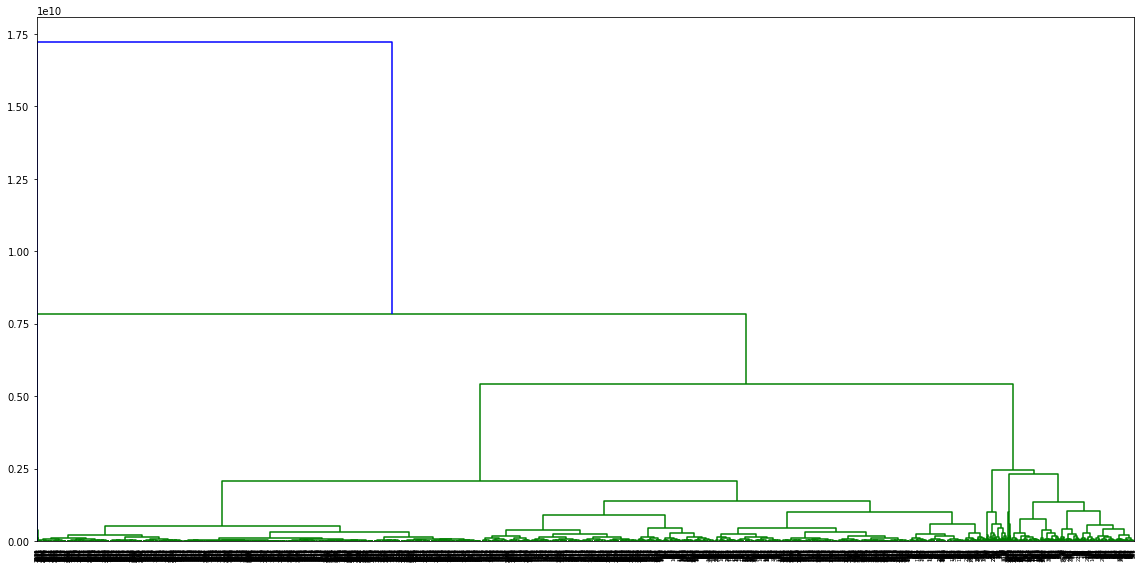

In [71]:
# create agglomerative clustering
plt.figure(figsize=(16,8))

linkage_matrix = ward(X)
dendrogram(linkage_matrix, orientation="top")
plt.tight_layout() # fixes margins

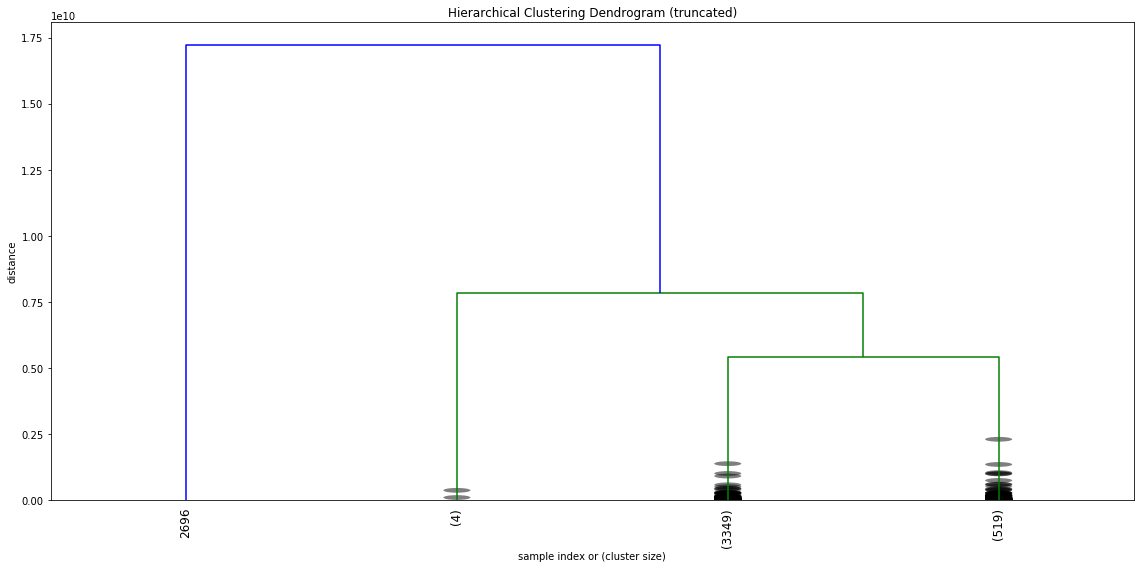

In [72]:
# visualize dendogram
plt.figure(figsize=(16,8))

plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')

linkage_matrix = ward(X)
dendrogram(linkage_matrix, 
           truncate_mode='lastp',  # show only the last p merged clusters
           p=4,  # show only the last p merged clusters
           #show_leaf_counts=False,  # otherwise numbers in brackets are counts
           leaf_rotation=90.,
           leaf_font_size=12.,
           show_contracted=True,  # to get a distribution impression in truncated branches
           orientation="top")
plt.tight_layout() # fixes margins

In [73]:
#To add cluster label into the dataset as a column
df5 = pd.DataFrame(agg.labels_, columns = ['cluster'])
df5.head()

,cluster
0,0
1,0
2,0
3,0
4,0


In [74]:
df6 = df4.join(df5)
df6.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,actor_2_facebook_likes,movie_facebook_likes,cluster
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,936.0,33000,0
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,5000.0,0,0
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,245000000.0,393.0,85000,0
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,23000.0,164000,0
4,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,1.0,738.0,263700000.0,632.0,24000,0


In [75]:
# find how many observations in each cluster
df6.groupby('cluster').size()

cluster
0    519 
1    3349
2    4   
3    1   
dtype: int64

In [76]:
# find the mean of each cluster for profiling
df6.groupby('cluster').mean()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,actor_2_facebook_likes,movie_facebook_likes
cluster,,,,,,,,,,,,,
0,287.955684,121.974952,1712.294798,1801.252408,12313.951830,1.860866e+08,287088.820809,20253.608863,1.211946,760.344894,1.182387e+08,4273.522158,25454.447013
1,144.041206,108.068976,639.864139,592.939385,6883.473276,3.025910e+07,74283.338011,9928.548223,1.409973,261.092266,2.701952e+07,1622.775754,6584.772469
2,138.500000,120.750000,1530.750000,221.000000,526.750000,7.790335e+05,73597.500000,1154.750000,0.250000,206.250000,2.806880e+09,328.750000,4145.000000
3,363.000000,110.000000,584.000000,74.000000,629.000000,2.201412e+06,68883.000000,1173.000000,0.000000,279.000000,1.221550e+10,398.000000,7000.000000


### Movie profiling based on Agglomerative Clustering (Using 4 different measures: lowest, low, high, highest):


**Cluster 0:**
* high num_critic for_reviews
* highest duration
* highest director_facebook_likes
* highest actor_3_facebook_likes
* highest actor_1_facebook_likes
* highest gross
* highest num_voted_users
* highest cast_total_facebook_likes
* high facenumber_in_poster
* highest num_user_for_reviews
* high budget
* highest actor_2_facebook_likes
* highest movie_facebook_likes

**Cluster 1:**
* high num_critic_for_reviews
* lowest duration
* low director_facebook_likes
* high actor_3_facebook_likes
* high actor_1_facebook_likes
* high gross
* low num_voted_users
* high cast_total_facebook_likes
* highest facenumber_in_poster
* low num_user_for_reviews
* lowest budget
* high actor_2_facebook_likes
* low movie_facebook_likes

**Cluster 2:**
* lowest num_critic_for_reviews
* high duration
* high director_facebook_likes
* low actor_3_facebook_likes
* lowest actor_1_facebook_likes
* lowest gross
* low num_voted_users
* lowest cast_total_facebook_likes
* low facenumber_in_poster
* lowest num_user_for_reviews
* high budget 
* lowest actor_2_facebook_likes
* lowest movie_facebook_likes

**Cluster 3:**
* highest num_critic_for_reviews
* low duration
* lowest director_facebook_likes
* lowest actor_3_facebook_likes
* low actor_1_facebook_likes
* low gross
* lowest num_voted_users
* low cast_total_facebook_likes
* lowest facenumber_in_poster
* low num_user_for_reviews
* highest budget
* low actor_2_facebook_likes
* high movie_facebook_likes

## 7. Other Analysis

In [77]:
# create another dataframe 
df_rev = pd.read_csv("data/movie_metadata.csv")
df_rev.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_tt_tt_1,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pirate|singapore,http://www.imdb.com/title/tt0449088/?ref_=fn_tt_tt_1,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_tt_tt_1,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police officer|terrorist plot,http://www.imdb.com/title/tt1345836/?ref_=fn_tt_tt_1,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_tt_tt_1,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [78]:
# save the data
#handling missing value: remove the rows with any missing value
df_rev = df_rev.dropna()
df_rev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3756 entries, 0 to 5042
Data columns (total 28 columns):
color                        3756 non-null object
director_name                3756 non-null object
num_critic_for_reviews       3756 non-null float64
duration                     3756 non-null float64
director_facebook_likes      3756 non-null float64
actor_3_facebook_likes       3756 non-null float64
actor_2_name                 3756 non-null object
actor_1_facebook_likes       3756 non-null float64
gross                        3756 non-null float64
genres                       3756 non-null object
actor_1_name                 3756 non-null object
movie_title                  3756 non-null object
num_voted_users              3756 non-null int64
cast_total_facebook_likes    3756 non-null int64
actor_3_name                 3756 non-null object
facenumber_in_poster         3756 non-null float64
plot_keywords                3756 non-null object
movie_imdb_link              3756 non-

In [79]:
# create a new 'profit' column
df_rev['profit'] = df_rev['gross'] - df_rev['budget']
df_rev.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_tt_tt_1,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,523505847.0
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pirate|singapore,http://www.imdb.com/title/tt0449088/?ref_=fn_tt_tt_1,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,9404152.0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_tt_tt_1,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,-44925825.0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police officer|terrorist plot,http://www.imdb.com/title/tt1345836/?ref_=fn_tt_tt_1,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,198130642.0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|princess,http://www.imdb.com/title/tt0401729/?ref_=fn_tt_tt_1,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,-190641321.0


In [80]:
# remove unnecessary columns
df_rev = df_rev.drop(['color','director_name', 'title_year', 'language', 'plot_keywords', 'aspect_ratio','movie_imdb_link', 'cast_total_facebook_likes'], axis=1)
df_rev.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,actor_3_name,facenumber_in_poster,num_user_for_reviews,country,content_rating,budget,actor_2_facebook_likes,imdb_score,movie_facebook_likes,profit
0,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,Wes Studi,0.0,3054.0,USA,PG-13,237000000.0,936.0,7.9,33000,523505847.0
1,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,Jack Davenport,0.0,1238.0,USA,PG-13,300000000.0,5000.0,7.1,0,9404152.0
2,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,Stephanie Sigman,1.0,994.0,UK,PG-13,245000000.0,393.0,6.8,85000,-44925825.0
3,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,Joseph Gordon-Levitt,0.0,2701.0,USA,PG-13,250000000.0,23000.0,8.5,164000,198130642.0
5,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,Polly Walker,1.0,738.0,USA,PG-13,263700000.0,632.0,6.6,24000,-190641321.0


### a. Summary of general analysis

In [81]:
df_rev.sort_values('imdb_score', ascending=False).head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,actor_3_name,facenumber_in_poster,num_user_for_reviews,country,content_rating,budget,actor_2_facebook_likes,imdb_score,movie_facebook_likes,profit
1937,199.0,142.0,0.0,461.0,Jeffrey DeMunn,11000.0,28341469.0,Crime|Drama,Morgan Freeman,The Shawshank Redemption,1689764,Bob Gunton,0.0,4144.0,USA,R,25000000.0,745.0,9.3,108000,3341469.0
3466,208.0,175.0,0.0,3000.0,Marlon Brando,14000.0,134821952.0,Crime|Drama,Al Pacino,The Godfather,1155770,Robert Duvall,1.0,2238.0,USA,R,6000000.0,10000.0,9.2,43000,128821952.0
66,645.0,152.0,22000.0,11000.0,Heath Ledger,23000.0,533316061.0,Action|Crime|Drama|Thriller,Christian Bale,The Dark Knight,1676169,Morgan Freeman,0.0,4667.0,USA,PG-13,185000000.0,13000.0,9.0,37000,348316061.0
2837,149.0,220.0,0.0,3000.0,Al Pacino,22000.0,57300000.0,Crime|Drama,Robert De Niro,The Godfather: Part II,790926,Robert Duvall,1.0,650.0,USA,R,13000000.0,14000.0,9.0,14000,44300000.0
339,328.0,192.0,0.0,416.0,Billy Boyd,5000.0,377019252.0,Action|Adventure|Drama|Fantasy,Orlando Bloom,The Lord of the Rings: The Return of the King,1215718,Bernard Hill,2.0,3189.0,USA,PG-13,94000000.0,857.0,8.9,16000,283019252.0


**The top successful 3 movies with the highest imdb rating are "The Shawshank Redemption", "The Godfather", and "The Dark Knight".** 	

In [82]:
df_rev['imdb_score'].describe()

count    3756.000000
mean     6.465282   
std      1.056247   
min      1.600000   
25%      5.900000   
50%      6.600000   
75%      7.200000   
max      9.300000   
Name: imdb_score, dtype: float64

In [83]:
df_rev.groupby('movie_title')['profit'].sum().sort_values(ascending=False).head()

movie_title
The Avengers                           806559094.0
Avatar                                 523505847.0
Jurassic World                         502177271.0
Titanic                                458672302.0
Star Wars: Episode IV - A New Hope     449935665.0
Name: profit, dtype: float64

**The most profitable movies are "The Avengers", "Avatar", "Jurassic World", "Titanic", and "Star Wars: Episode IV - A New Hope".**

In [84]:
df_rev['genres'].value_counts().head()

Comedy|Drama|Romance    147
Drama                   141
Comedy                  138
Comedy|Drama            138
Comedy|Romance          131
Name: genres, dtype: int64

**The most popular genre is comedy/drama/romance movie.**

In [85]:
df_rev['budget'].describe()

count    3.756000e+03
mean     4.623685e+07
std      2.260103e+08
min      2.180000e+02
25%      1.000000e+07
50%      2.500000e+07
75%      5.000000e+07
max      1.221550e+10
Name: budget, dtype: float64

In [86]:
df_rev['budget'].mean()

46236849.637912676

**The average budget per movie is $46,236,849.64.**

In [87]:
df_rev['profit'].describe()

count    3.756000e+03
mean     6.375975e+06
std      2.299190e+08
min     -1.221330e+10
25%     -1.050363e+07
50%      1.600370e+06
75%      2.595481e+07
max      5.235058e+08
Name: profit, dtype: float64

In [88]:
df_rev['profit'].mean()

6375974.599574015

**The average profit per movie is $6,375,974.6.**

### b. Duration vs. imdb_score

In [89]:
df_rev['duration'].describe()

count    3756.000000
mean     110.257987 
std      22.646717  
min      37.000000  
25%      96.000000  
50%      106.000000 
75%      120.000000 
max      330.000000 
Name: duration, dtype: float64

In [90]:
df_dur = df_rev.pivot_table(index=['duration'], values='imdb_score', fill_value=0)
df_dur.sort_values('imdb_score', ascending=False).head()

,imdb_score
duration,
192.0,8.9
185.0,8.9
289.0,8.5
293.0,8.4
227.0,8.4


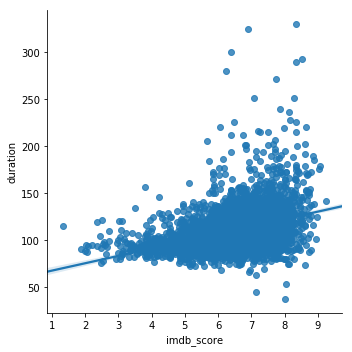

In [91]:
sns.lmplot("imdb_score", "duration", df_rev, y_jitter=0.40, x_jitter=.40)

**By looking at the graph, it can be concluded that the longer a movie is, the more likely a movie gets a higher rating.**

### c. Number of voted users vs. imdb_score

In [92]:
df_vote = df_rev.pivot_table(index=['num_voted_users'], values='imdb_score', fill_value=0).sort_values('imdb_score', ascending=False).head()
df_vote

,imdb_score
num_voted_users,
1689764,9.3
1155770,9.2
790926,9.0
1676169,9.0
1324680,8.9


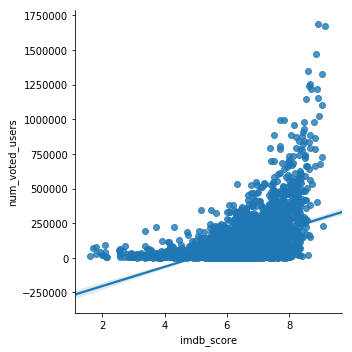

In [93]:
sns.lmplot("imdb_score", "num_voted_users", df_rev, y_jitter=0.40, x_jitter=.40)

**By looking at the graph, the more voted a movie is, the more likely that movie gets a higher rating.**

### d. Director facebook likes vs. imdb_score

In [94]:
df_rev.pivot_table(index=['director_facebook_likes'], values='imdb_score', fill_value=0).sort_values('imdb_score', ascending=False).head()

,imdb_score
director_facebook_likes,
194.0,8.600
373.0,8.500
330.0,8.500
22000.0,8.425
412.0,8.300


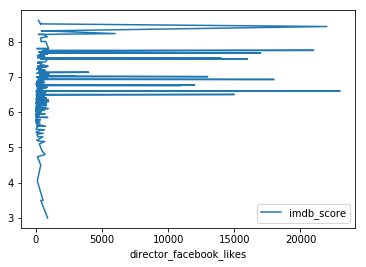

In [95]:
df_rev.pivot_table(index=['director_facebook_likes'], values='imdb_score', fill_value=0).sort_values('imdb_score', ascending=False).plot()

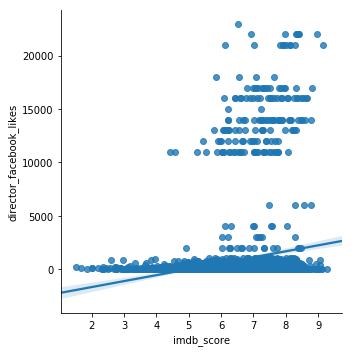

In [96]:
sns.lmplot("imdb_score", "director_facebook_likes", df_rev, y_jitter=0.40, x_jitter=.40)

**By looking at the graphs, the more a director's facebook likes are, the more likely that movie gets a higher rating.**

### e. Actor 1 facebook likes vs. imdb_score

In [97]:
df_rev.pivot_table(index=['actor_1_facebook_likes'], values='imdb_score', fill_value=0).sort_values('imdb_score', ascending=False).head()

,imdb_score
actor_1_facebook_likes,
888.0,8.7
17.0,8.6
36.0,8.5
606.0,8.5
362.0,8.4


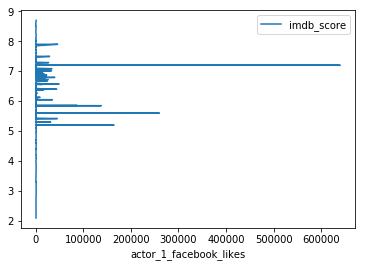

In [98]:
df_rev.pivot_table(index=['actor_1_facebook_likes'], values='imdb_score', fill_value=0).sort_values('imdb_score', ascending=False).plot()

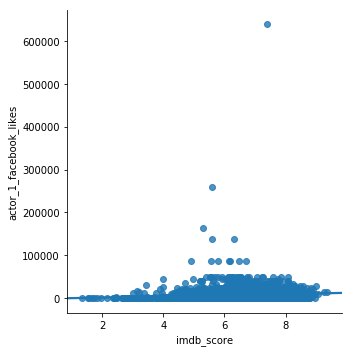

In [99]:
sns.lmplot("imdb_score", "actor_1_facebook_likes", df_rev, y_jitter=0.40, x_jitter=.40)

**By looking at the graphs, the number of the primary actor facebook likes does not affect the imdb rating.**

### f. Actor 2 facebook likes vs. imdb_score

In [100]:
df_rev.pivot_table(index=['actor_2_facebook_likes'], values='imdb_score', fill_value=0).sort_values('imdb_score', ascending=False).head()

,imdb_score
actor_2_facebook_likes,
34.0,8.90
604.0,8.50
27000.0,8.45
504.0,8.40
88.0,8.20


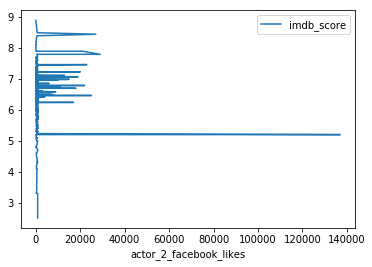

In [101]:
df_rev.pivot_table(index=['actor_2_facebook_likes'], values='imdb_score', fill_value=0).sort_values('imdb_score', ascending=False).plot()

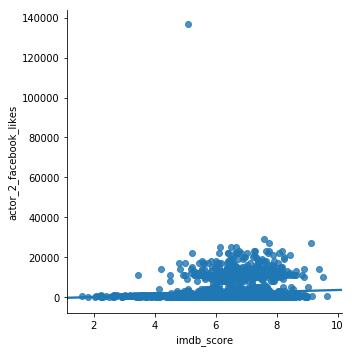

In [102]:
sns.lmplot("imdb_score", "actor_2_facebook_likes", df_rev, y_jitter=0.40, x_jitter=.40)

**By looking at the graphs, the number of the actor 2 facebook likes does not affect the imdb rating.**

### g. Actor 3 facebook likes vs. imdb_score

In [103]:
df_rev.pivot_table(index=['actor_3_facebook_likes'], values='imdb_score', fill_value=0).sort_values('imdb_score', ascending=False).head()

,imdb_score
actor_3_facebook_likes,
857.0,8.80
23000.0,8.65
513.0,8.50
620.0,8.40
802.0,8.30


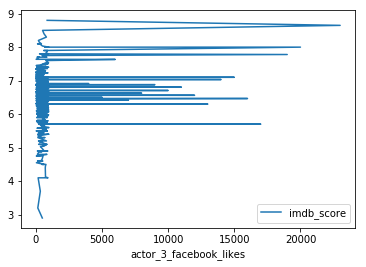

In [104]:
df_rev.pivot_table(index=['actor_3_facebook_likes'], values='imdb_score', fill_value=0).sort_values('imdb_score', ascending=False).plot()

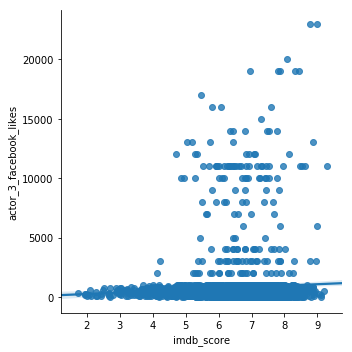

In [105]:
sns.lmplot("imdb_score", "actor_3_facebook_likes", df_rev, y_jitter=0.40, x_jitter=.40)

**By looking at the graphs, the number of the actor 3 facebook likes does not affect the imdb rating.**

### h. Number of critical reviews vs. imdb_score

In [106]:
df_rev.pivot_table(index=['num_critic_for_reviews'], values='imdb_score', fill_value=0).sort_values('imdb_score', ascending=False).head()

,imdb_score
num_critic_for_reviews,
645.0,9.0
642.0,8.8
712.0,8.6
813.0,8.5
765.0,8.5


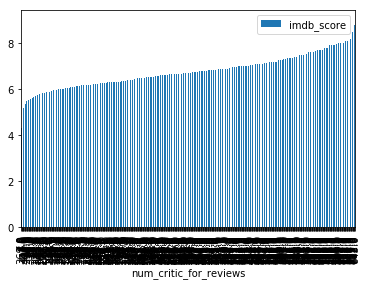

In [107]:
df_rev.pivot_table(index=['num_critic_for_reviews'], values='imdb_score', fill_value=0).sort_values('imdb_score').plot(kind='bar')

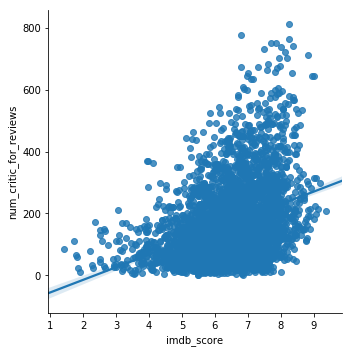

In [108]:
sns.lmplot("imdb_score", "num_critic_for_reviews", df_rev, y_jitter=0.40, x_jitter=.40)

**By looking at the graphs, the more the number of critical reviews for a movie is, the more likely that movie gets a higher rating.**

### i. Movie facebook likes vs. imdb_score

In [109]:
df_rev.pivot_table(index=['movie_facebook_likes'], values='imdb_score', fill_value=0).sort_values('imdb_score', ascending=False).head()

,imdb_score
movie_facebook_likes,
175000,8.80
349000,8.60
199000,8.50
164000,8.50
72000,8.25


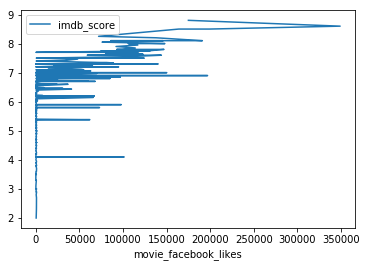

In [110]:
df_rev.pivot_table(index=['movie_facebook_likes'], values='imdb_score', fill_value=0).sort_values('imdb_score', ascending=False).plot()

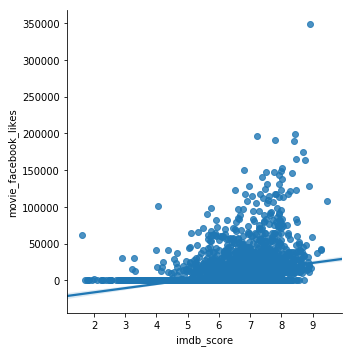

In [111]:
sns.lmplot("imdb_score", "movie_facebook_likes", df_rev, y_jitter=0.40, x_jitter=.40)

**By looking at the graphs, the more a movie facebook likes is, the more likely that movie gets a higher rating.**

### j. Country vs. imdb_score

In [112]:
df_rev['country'].describe()

count     3756
unique    45  
top       USA 
freq      2987
Name: country, dtype: object

In [113]:
df_rev.pivot_table(index=['country'], values='imdb_score', fill_value=0).sort_values('imdb_score', ascending=False).head()

,imdb_score
country,
West Germany,8.400
Israel,8.000
Brazil,7.760
Iran,7.725
Argentina,7.600


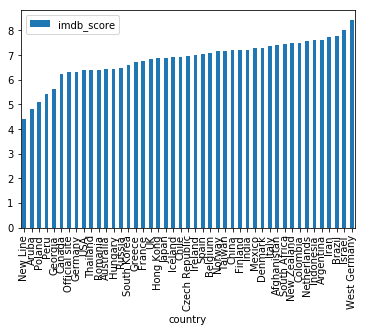

In [114]:
df_rev.pivot_table(index=['country'], values='imdb_score', fill_value=0).sort_values('imdb_score').plot(kind='bar')

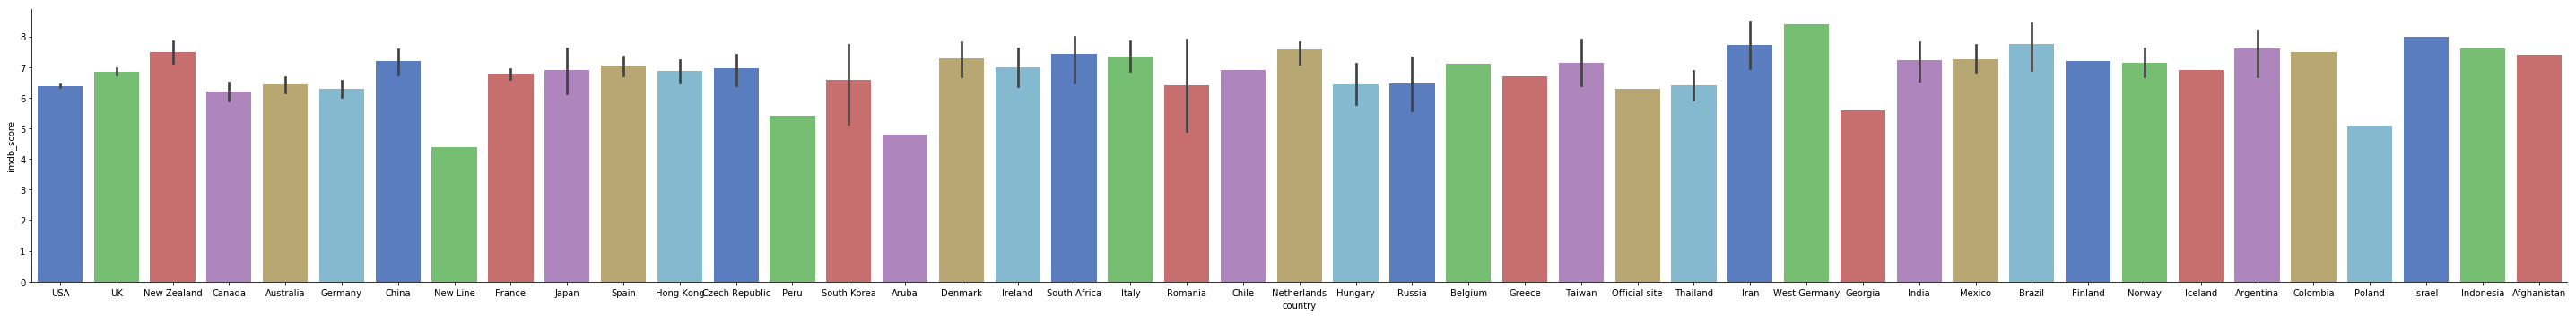

In [115]:
sns.factorplot("country", "imdb_score", data=df_rev, kind="bar", 
               size=5, aspect=8, palette="muted")

In [116]:
df_rev.pivot_table(index=['country'], values='imdb_score', aggfunc=sum, fill_value=0).sort_values('imdb_score', ascending=False).head()

,imdb_score
country,
USA,19082.6
UK,2180.5
France,684.2
Germany,504.3
Canada,366.6


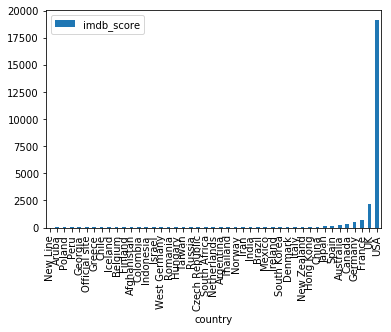

In [117]:
df_rev.pivot_table(index=['country'], values='imdb_score', aggfunc=sum, fill_value=0).sort_values('imdb_score').plot(kind='bar')

**By looking at the graphs, West Germany produced the highest imdb average score and New Line produced the lowest average imdb score. However, USA produced movies the most than any other countries with 19082 movies.**

### k. West Germany deeper analysis

In [118]:
westger = df_rev.loc[df_rev['country']=='West Germany']
westger.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,actor_3_name,facenumber_in_poster,num_user_for_reviews,country,content_rating,budget,actor_2_facebook_likes,imdb_score,movie_facebook_likes,profit
2970,96.0,293.0,249.0,18.0,Martin Semmelrogge,362.0,11433134.0,Adventure|Drama|Thriller|War,Jürgen Prochnow,Das Boot,168203,Herbert Grönemeyer,0.0,426.0,West Germany,R,14000000.0,21.0,8.4,11000,-2566866.0


In [119]:
westger.pivot_table(index=['movie_title'], columns='genres', values='imdb_score',aggfunc=sum, fill_value=0)

genres,Adventure|Drama|Thriller|War
movie_title,
Das Boot,8.4


**The top and highest-rated movie in West Germany is "Das Boot", an adventure/drama/thriller/war movie.**

### l. Budget vs. imdb_score

In [120]:
df_rev.pivot_table(index=['budget'], values='imdb_score', fill_value=0).sort_values('budget', ascending=False).head()

,imdb_score
budget,
1.221550e+10,7.0
4.200000e+09,7.7
2.500000e+09,7.1
2.400000e+09,8.4
2.127520e+09,6.9


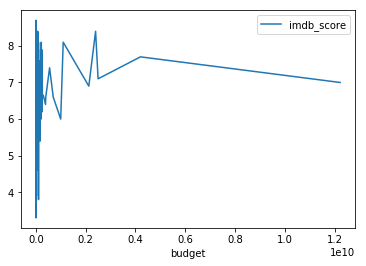

In [121]:
df_rev.pivot_table(index=['budget'], values='imdb_score', fill_value=0).sort_values('budget', ascending=False).plot()

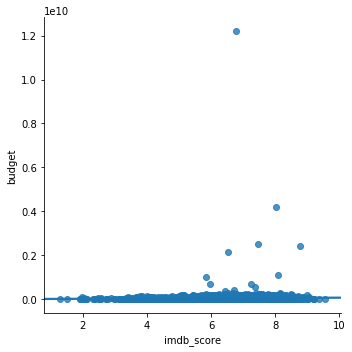

In [122]:
sns.lmplot("imdb_score", "budget", df_rev, y_jitter=0.40, x_jitter=.40)

**By looking at the graphs, budget has no positive or strong effect on a movie rating.**

### m. The number of faces in poster vs. imdb_score

In [123]:
df_rev.pivot_table(index=['facenumber_in_poster'], values='imdb_score', fill_value=0).sort_values('imdb_score', ascending=False).head()

,imdb_score
facenumber_in_poster,
43.0,7.700000
14.0,7.400000
31.0,7.100000
0.0,6.533059
1.0,6.479686


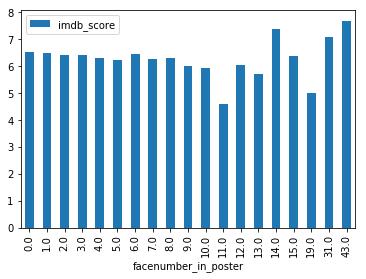

In [124]:
df_rev.pivot_table(index=['facenumber_in_poster'], values='imdb_score', fill_value=0).sort_values('facenumber_in_poster').plot(kind='bar')

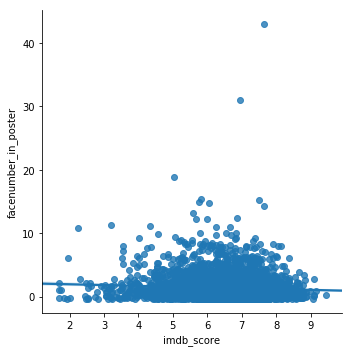

In [125]:
sns.lmplot("imdb_score", "facenumber_in_poster", df_rev, y_jitter=0.40, x_jitter=.40)

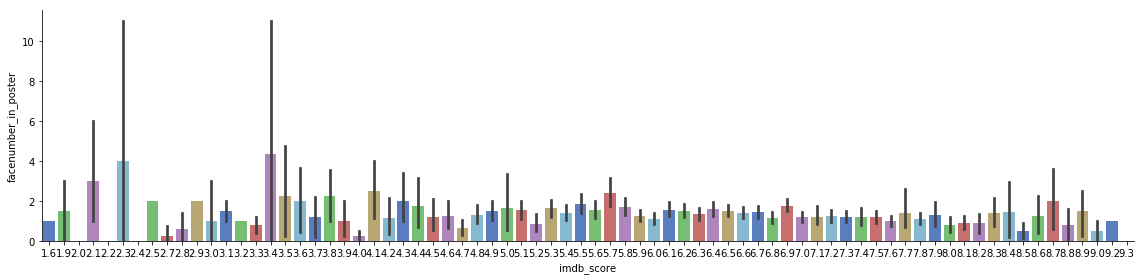

In [126]:
sns.factorplot("imdb_score", "facenumber_in_poster", data=df_rev, kind="bar", 
               size=4, aspect=4, palette="muted")

**By looking at the graphs, the number of faces in movie poster does not have a big or strong effect on a movie rating**

### n. Content rating	vs. imdb_score

In [127]:
df_rev.pivot_table(index=['content_rating'], values='imdb_score', fill_value=0).sort_values('imdb_score', ascending=False).head()

,imdb_score
content_rating,
Approved,7.470588
M,7.450000
Passed,7.133333
Not Rated,6.967647
Unrated,6.945455


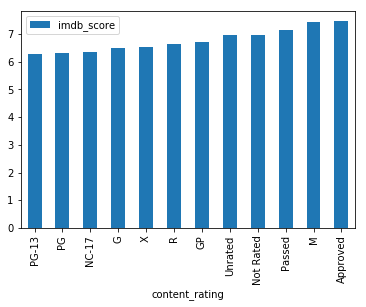

In [128]:
df_rev.pivot_table(index=['content_rating'], values='imdb_score', fill_value=0).sort_values('imdb_score').plot(kind='bar')

**By looking at the graph, a movie that has content rating of "Approved" has the highest average imdb score. While "PG-13" has the lowest average imdb score.**

## 8. Correlation analysis

In [129]:
corr = pd.DataFrame(df_rev.corr()['imdb_score'].drop('imdb_score'))
corr.sort_values(['imdb_score'], ascending = False)

,imdb_score
num_voted_users,0.482430
duration,0.366221
num_critic_for_reviews,0.347886
num_user_for_reviews,0.325003
movie_facebook_likes,0.281155
gross,0.214740
director_facebook_likes,0.192314
actor_2_facebook_likes,0.102372
actor_1_facebook_likes,0.093597
actor_3_facebook_likes,0.065544


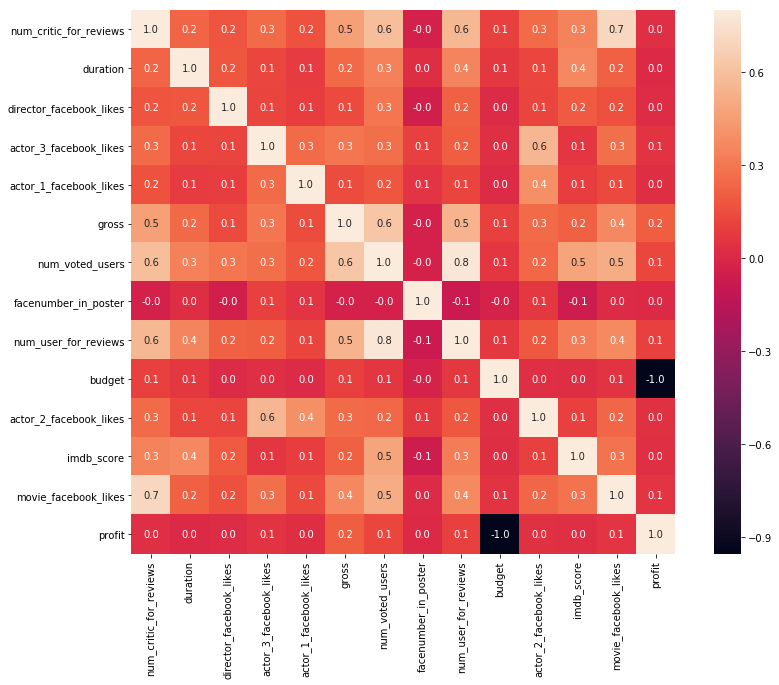

In [130]:
plt.figure(figsize=(14,10))
sns.heatmap(df_rev.corr(), vmax=.8, square=True, annot=True, fmt=".1f")

### From the correlation above, the variables that have positive relationship to a movie rating:

**Weak Positive Relationship (0.1 - 0.3):**
* The number of critical reviews
* Director facebook likes
* All actors (1, 2, 3) facebook likes
* Number of users for review
* Movie facebook likes

**This means that if any of these variables are high or great, that does not necessarily mean the movie rating is good or high. For example, if a movie facebook page has a huge number of likes, it does not always mean that the movie imdb rating is high. However, since the relationship is positive, these variables can affect the movie rating but not greatly.**

**Moderate Positive Relationship (0.4 - 0.5):**
* Number of voted users
* Duration
 

**This means that duration and number of voted users are the top variables that are more likely to lead to a higher movie rating. However, since the positive relationship is not strong, having higher values of duration or number of voted users does not necessarily mean that the movie rating is going to be high.**


**Strong relationship between key variables (0.6 - 0.8) NOT related to a movie rating:**
* Movie facebook likes and number of critics for reviews, which means that the movie popularity in facebook can be affected by critics.
* Number of critics for reviews and number of voted users, which means that many people who vote the movie also give critical review for the movie. 
* Number of voted users and movie facebook likes, which means that many people who voted for the movie also like on their facebook page. 
* Number of critics for reviews and number of user for reviews, which means that many people who wrote a review also give a critical review on imdb.
* Number of voted users and number of user for reviews (very strong correlation), which means that people who wrote a review also give a vote for a movie.

## 9. Summary and Insights 

**Regression Analysis:**
* Model Multiple Regression:
    * This model has a low accuracy rate of predicting, **32.16%** and it is not be the best model since it has too many X variables and implementing too complexed model in the real world would not be possible.
    * Too many variables also caused multicollinearity.

* Model RandomForest Regressor:
    * From the RandomForestRegressor model, we have a very high r-sq, **90.72%** and a very low MSE, which is very good at predicting. The best predictor from this model seems to be num_voted_users.

* Model Ridge:
    * From Ridge technique, removes some predictors to make the model simpler. Also, the MSE we got is very high which is bad. And, the r-sq is **32.16%** of being accurate, which is pretty inaccurate.

* Model Feature Selection:
    * From Feature Selection technique, the MSE we got is very high which is bad. And, the r-sq is **27.31%** of being accurate, which is inaccurate for predicting.

**Classification Analysis:**
* Model Decision Tree:
    * The simpler decision tree model (depth =5) actually has a better prediction accuracy rate with **69.44%** than the complex decision tree model.

* Model KNN:
    * The KNN model has a **52.83%** of being accurately predicting. Based from our KNN model, it seems that the optimal value is 19 with 55.9% accuracy rate.

* Model Logistics Regression:
    * The logistics regression model has **63.6%** of being accurately predicting.

* Model Random Forest Classifier:
    * Random forest classifier has a prediction accuracy rate of **73.84%**, which is good.

* Model Feature Selection Classification:
    * The best predictors based on feature selection model are director_facebook_likes, gross, num_voted_users, budget, movie_facebook_likes. The feature selection classification model has a predicting rate of **65.15%** of being correct.

**Clustering Analysis:**
* Movie profiling based on K-means (Using 4 different measures: lowest, low, high, highest):
    * Cluster 0: 
            - lowest all variables
    * Cluster 1: 
            - highest all variables except director facebook likes and actor 1 facebook likes are high
    * Cluster 2: 
            - high number of critic for reviews, duration, actor 3 facebook likes, gross, number of voted users, cast total facebook likes, number of user for reviews, actor 2 facebook likes, movie facebook likes
            - highest director facebook likes, actor 1 facebook likes
            - low budget
    * Cluster 3:
            - low duration, director facebook likes, actor 3 facebook likes, gross, number of voted users, cast total facebook likes, number of user for reviews, actor 2 facebook likes, movie facebook likes
            - high number of critic for reviews, actor 1 facebook likes, budget
    * Not important factor (the mean in each cluster is almost same):
            - facenumber_in_poster
* Model Elbow Method (K-means):
    * Based on the elbow method (K-means), we find that the optimal value is 3 because number of clusters of 4 and beyond has insignificant difference.

* Movie profiling based on Agglomerative Clustering (Using 4 different measures: lowest, low, high, highest):
    * Cluster 0:
            - highest duration, director facebook likes, actor 3 facebook likes, actor 1 facebook likes, gross, number of voted users, cast total facebook likes, number of user for reviews, actor 2 facebook likes, movie facebook likes
            - high number of critic for reviews, face number in poster, budget
    * Cluster 1:
            - high number of critic for reviews, actor 3 facebook likes, actor 1 facebook likes, gross, cast total facebook likes, actor 2 facebook likes
            - low director facebook likes, number of voted users, number of user for reviews, movie facebook likes
            - lowest budget, duration
            - highest face number in poster
    * Cluster 2:
            - lowest number of critic for reviews, actor 1 facebook likes, gross, cast total facebook likes, number of user for reviews, actor 2 facebook likes, movie facebook likes
            - high duration, director facebook likes, budget
            - low actor 3 facebook likes, number of voted users, face number in poster
    * Cluster 3:
            - low duration, actor 1 facebook likes, gross, cast total facebook likes, number of user for reviews, actor 2 facebook likes
            - lowest director facebook likes, actor 3 facebook likes, number of voted users, face number in poster, number of user for reviews, actor 2 facebook likes
            - highest number of critic for reviews, budget
            - high movie facebook likes


**Which model is the best to use for predicting a movie's success?**
* **RandomForest Regressor has the best prediction rate and the least errors among all regression and classification models done previously with a very high accuracy rate of 90.72%**


**Overall summary:**
* The top successful 3 movies with the highest imdb rating are "The Shawshank Redemption", "The Godfather", and "The Dark Knight".
* The most profitable movies are "The Avengers", "Avatar", "Jurassic World", "Titanic", and "Star Wars: Episode IV - A New Hope".
* The most popular genre is comedy/drama/romance movie.
* The average budget per movie is 46.2 million dollars.
* The average profit per movie is 6.4 million dollars. 
* USA produced movies the most than any other countries with 19082 movies.

**Detailed and more in-depth summary:**
* The longer a movie is, the more likely a movie gets a higher rating.
* The more voted a movie is, the more likely that movie gets a higher rating.
* The more a director's facebook likes are, the more likely that movie gets a higher rating.
* The number of any actor facebook likes do not affect the imdb rating is.
* The more the number of critical reviews for a movie is, the more likely that movie gets a higher rating.
* The more a movie facebook likes is, the more likely that movie gets a higher rating.
* West Germany produced the highest imdb average score and New Line produced the lowest average imdb score. 
* The top and highest-rated movie in West Germany is "Das Boot", an adventure/drama/thriller/war movie.
* Budget has no positive or strong effect on a movie rating.
* The number of faces in movie poster does not have a big or strong effect on a movie rating.
* A movie that has content rating of "Approved" has the highest average imdb score.  
* "PG-13" content has the lowest average imdb score.
* The most important variables that affect a movie rating are duration and number of voted users (positive correlation). 

## References

* https://nycdatascience.com/blog/student-works/machine-learning/movie-rating-prediction/
* https://public.tableau.com/views/DataVisualizationonIMDB-Top5000moviedataset/DescriptiveAnalysisofIMDBMovies?:embed=y&:showVizHome=no&:host_url=https%3A%2F%2Fpublic.tableau.com%2F&:tabs=yes&:toolbar=yes&:animate_transition=yes&:display_static_image=no&:display_spinner=no&:display_overlay=yes&:display_count=yes&publish=yes&:loadOrderID=0
* https://public.tableau.com/views/DataVisualizationonIMDB-Top5000moviedataset/IMDBCorrelations?%3Aembed=y&%3AshowVizHome=no&%3Ahost_url=https%3A%2F%2Fpublic.tableau.com%2F&%3Atabs=yes&%3Atoolbar=yes&%3Aanimate_transition=yes&%3Adisplay_static_image=no&%3Adisplay_spinner=no&%3Adisplay_overlay=yes&%3Adisplay_count=yes&publish=yes&%3AloadOrderID=0